In [484]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pickle import dump

## 1.Loading Data

In [415]:
data = pd.read_csv('Datasets/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 2. Data analysis

In [288]:
data.shape

(214, 10)

In [289]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [290]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## 3.Data processing

#### Spliting X,y

In [416]:
X = data.drop(labels='Type',axis=1)
y = data[['Type']]

#### scaling data

In [417]:
std_sclr = StandardScaler()
col = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X),columns=col)

In [418]:
X.shape,y.shape

((214, 9), (214, 1))

#### Train test split

In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=24,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((171, 9), (43, 9), (171, 1), (43, 1))

## 4. Base model building and training

In [420]:
base_model = KNeighborsClassifier()
base_model.fit(X_train,y_train)

KNeighborsClassifier()

In [421]:
y_pred1 = base_model.predict(X_test)

In [422]:
accuracy_score(y_test,y_pred1)

0.6976744186046512

In [423]:
confusion_matrix(y_test,y_pred1)

array([[11,  2,  1,  0,  0,  0],
       [ 4, 11,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 2,  0,  0,  0,  0,  4]])

In [424]:
print('\n',classification_report(y_test,y_pred1))


               precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         6

    accuracy                           0.70        43
   macro avg       0.72      0.64      0.67        43
weighted avg       0.69      0.70      0.69        43



## 7.Hyper parameter tuning :Optimum value of neighbors

In [425]:
params = {'n_neighbors':[3,5,7,9,11]}

grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 7}
0.6552941176470588


## 8.Feature Selection

In [458]:
feature_selection =sfs(estimator=KNeighborsClassifier(),k_features=7,forward=True,n_jobs=-1)
feature_selection.fit(X_train,y_train)
selected_features = list(feature_selection.k_feature_names_)
selected_features

['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']

In [459]:
X_train_selected = feature_selection.transform(X_train)
X_train_selected.shape

(171, 7)

In [460]:
X_test_selected = feature_selection.transform(X_test)
X_test_selected.shape

(43, 7)

In [461]:
X_train_selected.shape,X_test_selected.shape,y_train.shape,y_test.shape

((171, 7), (43, 7), (171, 1), (43, 1))

## 9. model with best features

In [462]:
Knn_model1 = KNeighborsClassifier()
Knn_model1.fit(X_train_selected,y_train)
pred = Knn_model1.predict(X_test_selected)

In [463]:
accuracy_score(y_test,pred)

0.6976744186046512

### 10.checking for outliers

## using percentiles

In [464]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [465]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [466]:
data2 = X[['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']]
data2['Type'] = y
data2.head()

,RI,Mg,Al,Si,K,Ca,Ba,Type
0,0.872868,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,1
1,-0.249333,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,1
2,-0.721318,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,1
3,-0.232831,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,1
4,-0.312045,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,1


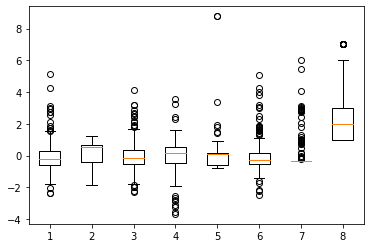

In [467]:
plt.boxplot(data2)
plt.show()

In [468]:
temp_data = data2

In [469]:
print(temp_data.shape)
upper_limit = temp_data['Ca'].quantile(.95)
lower_limit = temp_data['Ca'].quantile(.05)

f1 = temp_data['Ca'] < upper_limit
f2 = temp_data['Ca'] > lower_limit

temp_data = temp_data[f1 & f2]
temp_data.shape

(214, 8)


(192, 8)

In [470]:
X = temp_data.drop(labels='Type',axis=1)
y = temp_data[['Type']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=24,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((153, 7), (39, 7), (153, 1), (39, 1))

In [471]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train,y_train)
y_pred2 = knn_model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.6666666666666666

#### Removing outliers decreasing the accuracy

## Final Model with 5 neighbors,7 features 

In [475]:
X = data[['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']]
y = data[['Type']]

In [476]:
std_sclr = StandardScaler()
col = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X),columns=col)

In [477]:
X.shape,y.shape

((214, 7), (214, 1))

In [478]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=24,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((171, 7), (43, 7), (171, 1), (43, 1))

In [479]:
Final_model = KNeighborsClassifier()
final_model.fit(X_train,y_train)

KNeighborsClassifier()

In [480]:
pred = final_model.predict(X_test)

In [481]:
accuracy_score(y_test,pred)

0.6976744186046512

In [482]:
confusion_matrix(y_test,pred)

array([[12,  1,  1,  0,  0,  0],
       [ 4, 10,  1,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0,  4]])

In [483]:
print('\n',classification_report(y_test,pred))


               precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.71      0.67      0.69        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         6

    accuracy                           0.70        43
   macro avg       0.72      0.62      0.65        43
weighted avg       0.71      0.70      0.69        43



## Model Deployment

In [485]:
dump(final_model,open('glass_type_pred.pkl','wb'))